# Boston house-pricesデータセットを用いた価格推定

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2021-08-28 10:54:59.338908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-28 10:54:59.373980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-28 10:54:59.374447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-08-28 10:54:59.375881: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

データダウンロード

In [2]:
(X_train, y_train), (X_test, y_test) = \
    tf.keras.datasets.boston_housing.load_data()

プロット

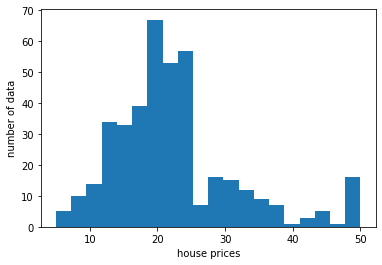

In [3]:
plt.hist(y_train, bins=20)
plt.xlabel("house prices")
plt.ylabel("number of data")
plt.show()

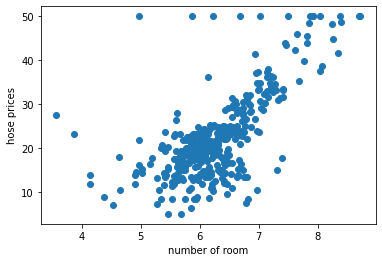

In [4]:
plt.plot(X_train[:, 5], y_train, "o")
plt.xlabel("number of room")
plt.ylabel("hose prices")
plt.show()

データの標準化

In [5]:
scaler_x = StandardScaler()
X_train_norm = scaler_x.fit_transform(X_train)
X_test_norm = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_norm = scaler_y.fit_transform(y_train[:, np.newaxis])
y_test_norm = scaler_y.transform(y_test[:, np.newaxis])

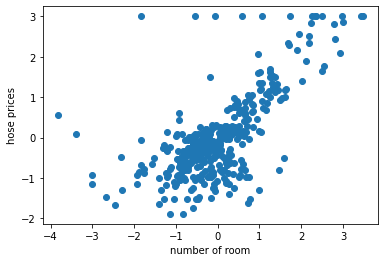

In [6]:
plt.plot(X_train_norm[:, 5], y_train_norm, "o")
plt.xlabel("number of room")
plt.ylabel("hose prices")
plt.show()

モデルの定義

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=13, use_bias=False))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)

In [9]:
history = model.fit(
    X_train_norm, y_train_norm,
    batch_size=X_train_norm.shape[0],
    epochs=100,
)

2021-08-28 10:55:03.891195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.8687
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8775
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6495
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5519
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4849
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4361
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3730
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3525
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3368
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3247
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3151
Epoch 13/100
1/1 [==============================] - 0s 7ms/ste

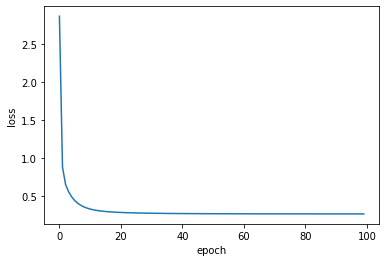

In [10]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

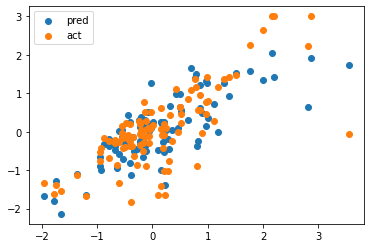

In [11]:
plt.scatter(X_test_norm[:, 5], model.predict(X_test_norm), label="pred")
plt.scatter(X_test_norm[:, 5], y_test_norm, label="act")
plt.legend()
plt.show()


ミニバッチによる計算

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=13, use_bias=False))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)

In [14]:
history = model.fit(
    X_train_norm, y_train_norm,
    batch_size=32,
    epochs=100,
)

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5523
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3783
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3466
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3043
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2937
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2956
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2851
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2753
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3165
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2924
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2819
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3123
Epoch 13/100
13/13 [=================

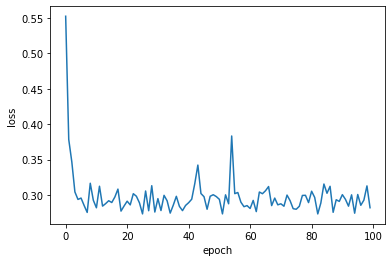

In [15]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## Functional API version

In [16]:
inputs = tf.keras.Input(shape=(13,))
outputs = tf.keras.layers.Dense(1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="model")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)

In [19]:
history = model.fit(
    X_train_norm, y_train_norm,
    batch_size=32,
    epochs=100,
)

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 1.7477
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3372
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3213
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3022
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2948
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2989
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3064
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2899
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2983
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3077
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3047
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2910
Epoch 13/100
13/13 [=================

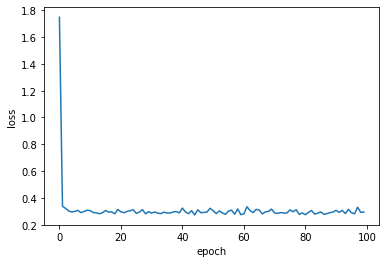

In [20]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## tf.keras.Model

In [21]:
batch_size = 32
class MyModel1(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense_layer = tf.keras.layers.Dense(13, use_bias=False)

    def call(self, inputs):
        return self.dense_layer(inputs)

In [22]:
model = MyModel1()
model.build(input_shape=(batch_size, 13))

In [23]:
model.summary()

Model: "my_model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  169       
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)

In [25]:
history = model.fit(
    X_train_norm, y_train_norm,
    batch_size=batch_size,
    epochs=100,
)

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 1.2863
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7211
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5946
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5229
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4741
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4382
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4096
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3893
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3715
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3587
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3482
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3392
Epoch 13/100
13/13 [=================

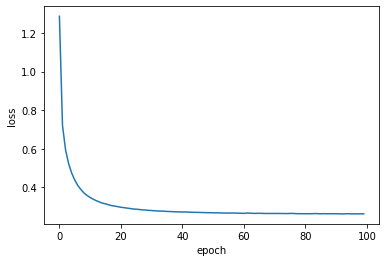

In [26]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
## 学習方法の変更

### Sequential API

In [80]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=13, use_bias=False))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [81]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# 評価指標
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')
mse = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(x, t):
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        #loss = tf.math.reduce_mean(tf.math.square(t - predictions))
        loss = mse(t, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

@tf.function
def test_step(x, t):
    test_predictions = model(x, training=False)
    #t_loss = tf.math.reduce_mean(tf.math.square(t - test_predictions))
    t_loss = mse(t, test_predictions)


    test_loss(t_loss)

In [82]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_norm.astype("float32"), y_train_norm[:, np.newaxis].astype("float32")))
train_ds = train_ds.shuffle(10000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_norm.astype("float32"), y_test_norm[:, np.newaxis].astype("float32")))
test_ds = test_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [83]:
for epoch in range(100):
  for X, y in train_ds:
    train_step(X, y) #学習

  for test_X, test_y in test_ds:
    test_step(test_X, test_y) #評価

  print(f'Epoch {epoch}, Loss: {train_loss.result().numpy()}, test-Loss: {test_loss.result().numpy()}')

Epoch 0, Loss: 0.7132667899131775, test-Loss: 0.5289119482040405
Epoch 1, Loss: 0.5414183139801025, test-Loss: 0.45029518008232117
Epoch 2, Loss: 0.4663226902484894, test-Loss: 0.4191618263721466
Epoch 3, Loss: 0.42482635378837585, test-Loss: 0.4267047643661499
Epoch 4, Loss: 0.4019489586353302, test-Loss: 0.46860116720199585
Epoch 5, Loss: 0.38525548577308655, test-Loss: 0.452480286359787
Epoch 6, Loss: 0.3715013861656189, test-Loss: 0.43280330300331116
Epoch 7, Loss: 0.3619896173477173, test-Loss: 0.43148213624954224
Epoch 8, Loss: 0.35209566354751587, test-Loss: 0.4228614866733551
Epoch 9, Loss: 0.3468417823314667, test-Loss: 0.4404333233833313
Epoch 10, Loss: 0.342049777507782, test-Loss: 0.4330996572971344
Epoch 11, Loss: 0.3379095494747162, test-Loss: 0.4340553283691406
Epoch 12, Loss: 0.33471113443374634, test-Loss: 0.429444819688797
Epoch 13, Loss: 0.33131566643714905, test-Loss: 0.42874523997306824
Epoch 14, Loss: 0.3291526138782501, test-Loss: 0.42397981882095337
Epoch 15, Lo

In [71]:
#model.predict(test_ds)
#y_test_norm[:10]

array([[-1.651809  ],
       [-0.39080722],
       [-0.36906581],
       [ 0.50059058],
       [-0.02120326],
       [ 0.22882296],
       [ 0.95716019],
       [ 0.05489168],
       [-0.20600524],
       [ 0.08750379]])

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=13, use_bias=False))
model.summary()
loss = tf.keras.losses.mse
optimizer = tf.keras.optimizers.SGD
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)
model.fit(train_ds, epochs=100)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0396
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4142
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3485
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3075
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2992
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3251
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2802
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2888
Epoch 9/100


## Functional API

In [84]:
inputs = tf.keras.Input(shape=(13,))
outputs = tf.keras.layers.Dense(1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="model")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [85]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# 評価指標
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')
mse = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(x, t):
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        #loss = tf.math.reduce_mean(tf.math.square(t - predictions))
        loss = mse(t, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

@tf.function
def test_step(x, t):
    test_predictions = model(x, training=False)
    #t_loss = tf.math.reduce_mean(tf.math.square(t - test_predictions))
    t_loss = mse(t, test_predictions)


    test_loss(t_loss)

In [86]:
for epoch in range(100):
  for X, y in train_ds:
    train_step(X, y) #学習

  for test_X, test_y in test_ds:
    test_step(test_X, test_y) #評価

  print(f'Epoch {epoch}, Loss: {train_loss.result().numpy()}, test-Loss: {test_loss.result().numpy()}')

Epoch 0, Loss: 0.7093674540519714, test-Loss: 0.5412766337394714
Epoch 1, Loss: 0.5340636372566223, test-Loss: 0.4872317314147949
Epoch 2, Loss: 0.4652053117752075, test-Loss: 0.44818761944770813
Epoch 3, Loss: 0.4254680871963501, test-Loss: 0.47839227318763733
Epoch 4, Loss: 0.40225639939308167, test-Loss: 0.45129841566085815
Epoch 5, Loss: 0.38186779618263245, test-Loss: 0.44247105717658997
Epoch 6, Loss: 0.3677402436733246, test-Loss: 0.4499284625053406
Epoch 7, Loss: 0.3572905659675598, test-Loss: 0.46318069100379944
Epoch 8, Loss: 0.35360682010650635, test-Loss: 0.4493250846862793
Epoch 9, Loss: 0.34668803215026855, test-Loss: 0.4505838453769684
Epoch 10, Loss: 0.3408815264701843, test-Loss: 0.4420202076435089
Epoch 11, Loss: 0.3378011882305145, test-Loss: 0.4495251476764679
Epoch 12, Loss: 0.33316367864608765, test-Loss: 0.4410998225212097
Epoch 13, Loss: 0.32981884479522705, test-Loss: 0.43586087226867676
Epoch 14, Loss: 0.32792696356773376, test-Loss: 0.4311530292034149
Epoch 1

## subclass api

In [87]:
batch_size = 32
class MyModel1(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense_layer = tf.keras.layers.Dense(13, use_bias=False)

    def call(self, inputs):
        return self.dense_layer(inputs)

In [88]:
model = MyModel1()
model.build(input_shape=(batch_size, 13))

In [89]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# 評価指標
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')
mse = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(x, t):
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        #loss = tf.math.reduce_mean(tf.math.square(t - predictions))
        loss = mse(t, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

@tf.function
def test_step(x, t):
    test_predictions = model(x, training=False)
    #t_loss = tf.math.reduce_mean(tf.math.square(t - test_predictions))
    t_loss = mse(t, test_predictions)


    test_loss(t_loss)

In [90]:
for epoch in range(100):
  for X, y in train_ds:
    train_step(X, y) #学習

  for test_X, test_y in test_ds:
    test_step(test_X, test_y) #評価

  print(f'Epoch {epoch}, Loss: {train_loss.result().numpy()}, test-Loss: {test_loss.result().numpy()}')

Epoch 0, Loss: 1.235130786895752, test-Loss: 1.1571004390716553
Epoch 1, Loss: 0.9970694780349731, test-Loss: 0.9985169768333435
Epoch 2, Loss: 0.8654887676239014, test-Loss: 0.8901915550231934
Epoch 3, Loss: 0.7761497497558594, test-Loss: 0.8116464018821716
Epoch 4, Loss: 0.7095345854759216, test-Loss: 0.752097487449646
Epoch 5, Loss: 0.6581687331199646, test-Loss: 0.7063791155815125
Epoch 6, Loss: 0.618925154209137, test-Loss: 0.6701282858848572
Epoch 7, Loss: 0.5890476703643799, test-Loss: 0.6422727704048157
Epoch 8, Loss: 0.5620816946029663, test-Loss: 0.6186115741729736
Epoch 9, Loss: 0.5382508635520935, test-Loss: 0.5992580652236938
Epoch 10, Loss: 0.5186293721199036, test-Loss: 0.5827468037605286
Epoch 11, Loss: 0.5010936856269836, test-Loss: 0.5686792731285095
Epoch 12, Loss: 0.48602575063705444, test-Loss: 0.5566140413284302
Epoch 13, Loss: 0.4727409780025482, test-Loss: 0.5461907386779785
Epoch 14, Loss: 0.46096137166023254, test-Loss: 0.5369247794151306
Epoch 15, Loss: 0.450